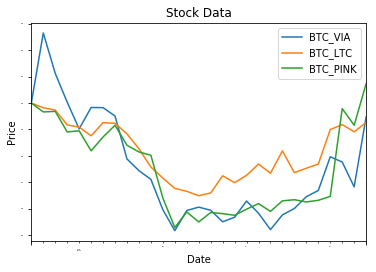

In [7]:
"""Fill missing values"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

def fill_missing_values(df_data):
    """Fill missing values in data frame, in place."""
    df_data.fillna(method='ffill', inplace=True)
    df_data.fillna(method='bfill', inplace=True)


def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "data/{}.csv".format(str(symbol)))


def get_data(currencies, dates):
    df1 = pd.DataFrame(index=dates)
    for currency in currencies:
        df_currency = pd.read_csv('data/{}.csv'.format(currency), index_col="date", parse_dates=True, usecols=['date', 'close'], na_values=['nan'])
        df_currency = df_currency.rename(columns={'close': currency})
        df1 = df1.join(df_currency)
    return df1


def plot_data(df_data):
    """Plot stock data with appropriate axis labels."""
    ax = df_data.plot(title="Stock Data", fontsize=2)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()

def normalize_data(df):
    return df / df.iloc[0,:]

def test_run():
    """Function called by Test Run."""
    # Read data
    dates = pd.date_range('2017-08-03', '2017-08-31')
    
    a = {'via': 'BTC_VIA', 'ltc': 'BTC_LTC', 'pink': 'BTC_PINK'}
    
    currencies = [a['via'], a['ltc'], a['pink']]
    
    df_data = get_data(currencies, dates)

    # Fill missing values
    fill_missing_values(df_data)

    # Plot
    plot_data(normalize_data(df_data))


if __name__ == "__main__":
    test_run()
